In [1]:
# 18222757 Maciej Augustynek ,18244327 Bartlomiej Skorecki
# Code executes till the end without errors
# Original source : https://www.kaggle.com/mcbean/fruit-classification-w-nn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os
import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras

In [3]:
fruit_images = []
labels = [] 
#We load the images and fruit labels inside the specified directory for the training dataset
for fruit_dir_path in glob.glob("./Training/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        #We resize each image to be 45x45
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #The images are saved in the list fruit_images
        fruit_images.append(image)
        #The labels are saved in the list labels
        labels.append(fruit_label)
        
#Both lists are changed into a numpy array to make it easier for them to work with the model
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [4]:
#Only used to display the unique labels received from the dataset
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [5]:
id_to_label_dict

{0: 'apple_6',
 1: 'apple_braeburn_1',
 2: 'apple_crimson_snow_1',
 3: 'apple_golden_1',
 4: 'apple_golden_2',
 5: 'apple_golden_3',
 6: 'apple_granny_smith_1',
 7: 'apple_hit_1',
 8: 'apple_pink_lady_1',
 9: 'apple_red_1',
 10: 'apple_red_2',
 11: 'apple_red_3',
 12: 'apple_red_delicios_1',
 13: 'apple_red_yellow_1',
 14: 'apple_rotten_1',
 15: 'cabbage_white_1',
 16: 'carrot_1',
 17: 'cucumber_1',
 18: 'cucumber_3',
 19: 'eggplant_violet_1',
 20: 'pear_1',
 21: 'pear_3',
 22: 'zucchini_1',
 23: 'zucchini_dark_1'}

In [6]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [7]:
fruit_images.shape, label_ids.shape, labels.shape

((6231, 45, 45, 3), (6231,), (6231,))

Counter({7: 468, 20: 326, 1: 320, 6: 320, 14: 319, 2: 318, 10: 318, 5: 316, 0: 315, 8: 313, 9: 309, 3: 308, 4: 308, 13: 308, 12: 300, 11: 281, 18: 163, 19: 160, 22: 160, 23: 160, 21: 144, 16: 101, 17: 100, 15: 96})
['apple_6' 'apple_6' 'apple_6' ... 'zucchini_dark_1' 'zucchini_dark_1'
 'zucchini_dark_1']
[315, 320, 318, 308, 308, 316, 320, 468, 313, 309, 318, 281, 300, 308, 319, 96, 101, 100, 163, 160, 326, 144, 160, 160]


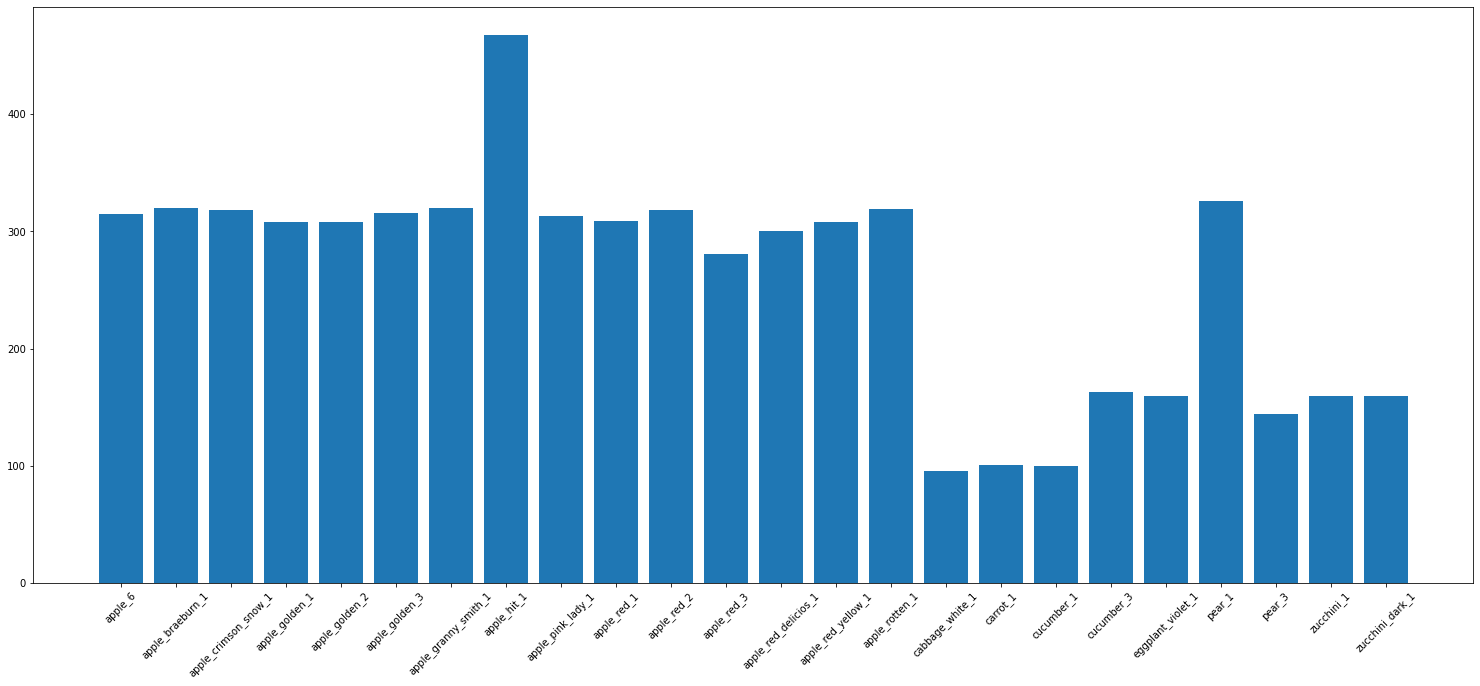

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

counterList = Counter([label_to_id_dict[x] for x in labels])

sorted(counterList)

data = list(counterList.values())
data2 = list(id_to_label_dict.values()) 
print(data)

fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(data2,data)
ax.set_xticklabels(data2, rotation=45)
plt.show()

In [9]:
validation_fruit_images = []
validation_labels = [] 
#We load the images and fruit labels inside the specified directory for the validation dataset
for fruit_dir_path in glob.glob("./Validation/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        #We resize each image to be 45x45
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #The images are saved in the list fruit_images
        validation_fruit_images.append(image)
        #The labels are saved in the list labels
        validation_labels.append(fruit_label)
        
#Both lists are changed into a numpy array to make it easier for them to work with the model
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [10]:
validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [11]:
validation_fruit_images.shape, validation_label_ids.shape

((3114, 45, 45, 3), (3114,))

In [12]:
#We store the Image values of the training and test dataset in X_train and X_test
#and we store the labels of the training and test dataset in Y_train and Y_test
X_train, X_test = fruit_images, validation_fruit_images
Y_train, Y_test = label_ids, validation_label_ids

#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255

#Make a flattened version for our MLP models
X_flat_train = X_train.reshape(X_train.shape[0], 45*45*3)
X_flat_test = X_test.reshape(X_test.shape[0], 45*45*3)


from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding
#One hot encoding coverts our labels so they can be processed by the ML model better to get a better prediction
#Needs to be changed to to_categorical since we have more than 2 classes to be identified in our dataset
Y_train = keras.utils.to_categorical(Y_train, 24)
Y_test = keras.utils.to_categorical(Y_test, 24)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (6231, 45, 45, 3) (3114, 45, 45, 3) (6231, 24) (3114, 24)
Flattened: (6231, 6075) (3114, 6075)


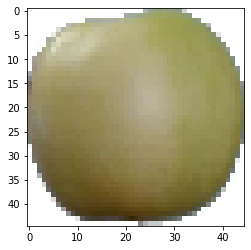

In [13]:

plt.imshow(X_train[0])
plt.show()

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.metrics import Precision , Recall



# Import the backend
from keras import backend as K

In [15]:
#Start creating our model Ver2
model_dense = Sequential()

#We use the pre-processed images as the input for our model but only in the initial layer.
#Relu is the activation function used
model_dense.add(Dense(128, activation='relu', input_shape=(X_flat_train.shape[1],)))
#Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.1))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dropout(0.1))
#We use the same number at the dense layer as we have classifications in our dataset.
#In our case we have 24 possible outcomes
model_dense.add(Dense(24, activation='softmax'))

#Displays the model details
model_dense.summary()

#Compile the model to put it all together.
model_dense.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',Precision(), Recall()])

history_dense = model_dense.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=25,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))

#Model is evaluated against the Test dataset after it was compiled
score = model_dense.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               777728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
Total params: 787,544
Trainable params: 787,544
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
49/49 [==============================] - 1s 10ms/step - loss: 2.5162 - accuracy: 0.2358 - precision: 0.63

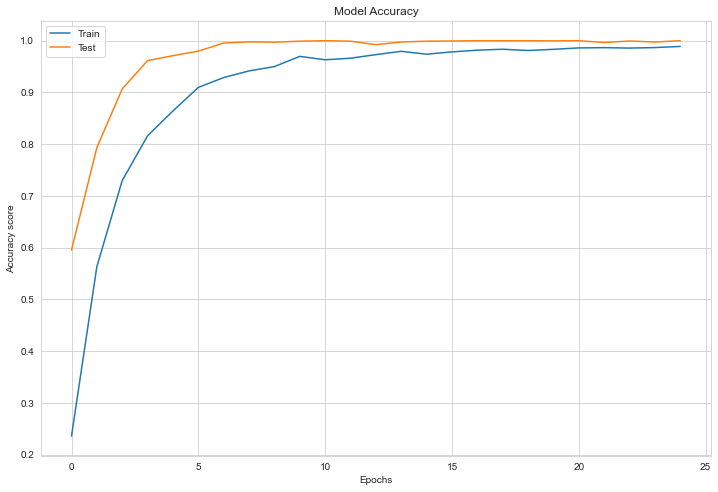

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [17]:
model_deep = Sequential()

#We use the pre-processed images as the input for our model but only in the initial layer.
#Relu is the activation function used
model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(64, activation='relu'))
model_deep.add(Dropout(0.05))
#We use the same number at the dense layer as we have classifications in our dataset.
#In our case we have 24 possible outcomes
model_deep.add(Dense(24, activation='softmax'))

model_deep.summary()

# Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',Precision(), Recall()])

history_deep = model_deep.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=25,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))

#Model is evaluated against the Test dataset after it was compiled
score = model_deep.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               1555456   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

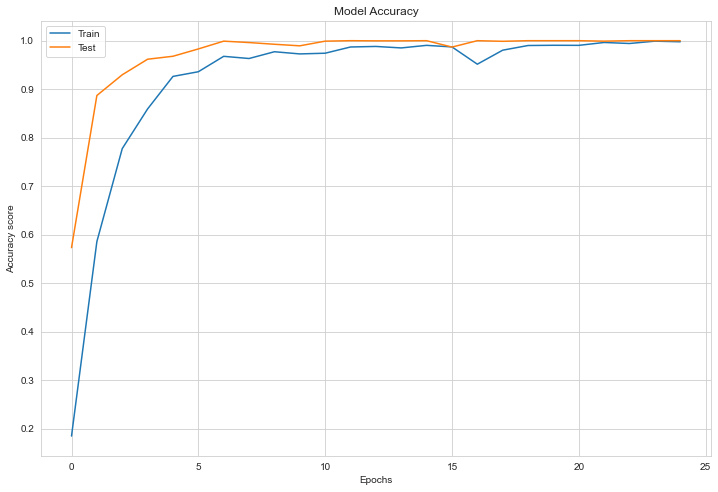

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history_deep.history['accuracy'])
plt.plot(history_deep.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()